<h1> ANN: Artificial Neural Networks </h1>
<br>
<h4> What are ANNs ? </h4>
<p>Artificial neural networks, usually simply called neural networks or neural nets, are computing systems inspired by the biological neural networks that constitute animal brains.</p>

<img align='left' width='500' src='https://www.tutorialspoint.com/artificial_intelligence/images/atypical_ann.jpg'>
<img align='right' width='500' src='https://miro.medium.com/max/1400/1*rptqFUQTMiruWZWKm-WMqQ.png'>


<p align ='right'> It contains input layer which is used to provide inputs to the neural networks.<br> This is then moved on to the hidden layer which computes various things.<br>And based on those computations we get the output layer<br>  Which neurons of the output layer is turned on determines where its classifed. In simple terms ANN is just a fancy classifier  </p>

<br>
<br>
<h4> Steps of ANN </h4>
<p> Here are simplified steps related to ANN which should be understood before coding </p>
<ol>
    <li> Initalize with random weights and bias </li>
    <li> Compute z for all input layers </li>
    <li> Feed z into activation function </li>
    <li> Procced to forward propagation on all layers </li>
    <li> Compute the cost function /loss function and Back propagate </li>
    <li> During Back Propagate adjusts weights and biases </li>
    <li> Repeat steps 2 to 6 untill n epochs </li>
</ol>

<h3> 0. Installing Dependencies </h3>

In [11]:
!pip install tensorflow
!pip install pandas
!pip install numpy 
!pip install -U scikit-learn
!pip install seaborn

     -------------------------------------- 288.2/288.2 kB 1.2 MB/s eta 0:00:00


<h3> 1. Importing Dependencies </h3>

In [47]:
import tensorflow as tf
from tensorflow import keras 
from keras import layers,models
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

<h3> 2. Preprocessing Dataset </h3>

In [78]:
def get_data(path_to_data):
    df=pd.read_csv(path_to_data)
    return df 
dataset=get_data('Data\\Titanic_Dataset.csv')
print(dataset.columns)
dataset

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<h4> 2.1. Visualizing various relationships </h4>

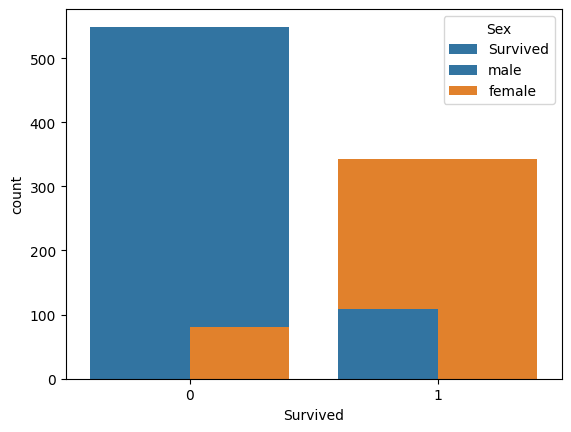

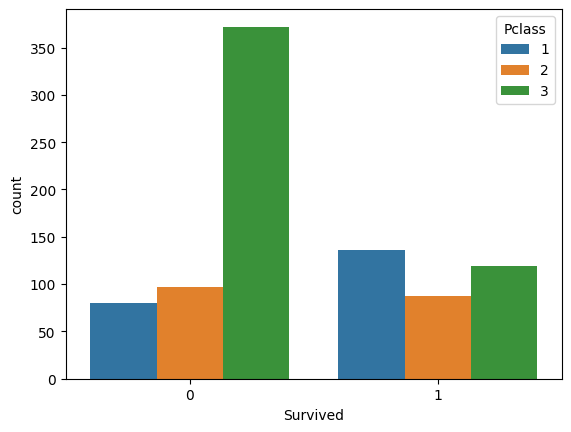

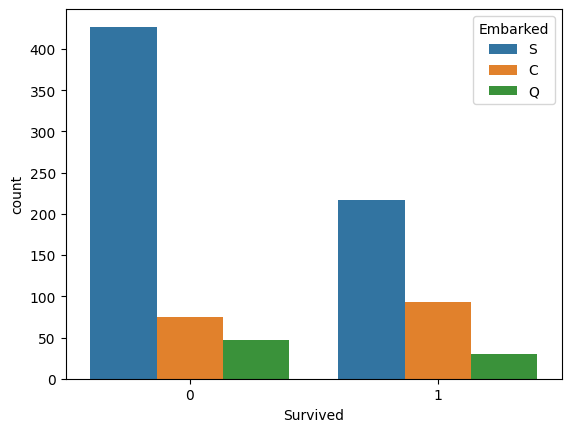

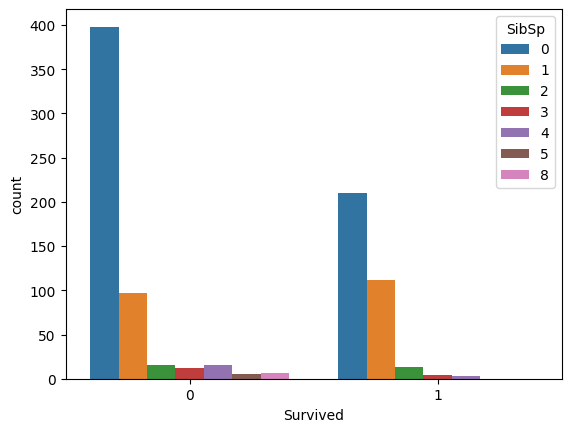

In [79]:
def visualize_relationships(dataset):
    #Check in how many people survived 
    
    sns.countplot(x='Survived',data=dataset,label='Survived')
    plt.figure(1)

    sns.countplot(x='Survived',hue='Sex',data=dataset)
    plt.figure(2)

    sns.countplot(x='Survived',hue='Pclass',data=dataset)
    plt.figure(3)

    sns.countplot(x='Survived',hue='Embarked',data=dataset) #Since no variation no relationship with embarked
    plt.figure(4)

    sns.countplot(x='Survived',hue='SibSp',data=dataset)
    

visualize_relationships(dataset)

<h3> 2.2 Cleaning Dataset </h3>

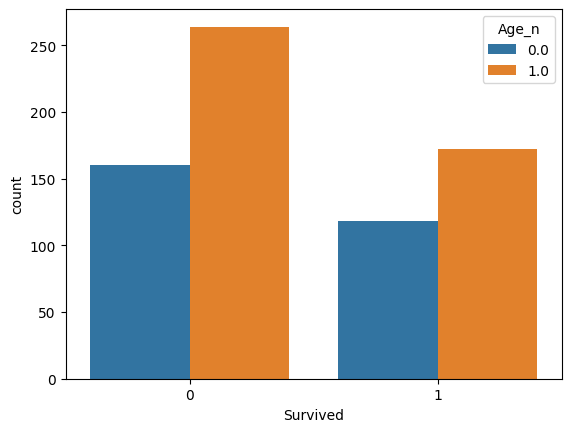

In [81]:
def normalize_0_to_1(x,f):
    if f=='gender':
        if x=='female':
            x=1
        elif x=='male':
            x=0
        
    return x 

def visualize_relationships_age_(dataset):
    sns.countplot(x='Survived',hue='Age_n',data=dataset)
    

dataset['Sex']=dataset['Sex'].apply(normalize_0_to_1,f='gender')
dataset['Age_n']=dataset['Age'].apply(normalize_0_to_1,f='age')
dataset['Age_n']=dataset['Age_n'].dropna()
visualize_relationships_age_(dataset)
final_dataset=dataset[['Pclass','Sex','Age_n','Survived']]

In [ ]:
X=final_dataset[['Pclass','Sex','Age_n']]